In [ ]:
# to test impots
import sys

for path in sys.path:
    print(path)

In [ ]:
import time

import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

formatter = logging.Formatter('%(levelname)s:%(name)s:%(message)s')

file_handler = logging.FileHandler('employee.log')
file_handler.setFormatter(formatter)

logger.addHandler(file_handler)

class Employee:
    """A sample Employee class"""

    def __init__(self, first, last):
        self.first = first
        self.last = last

        logger.info('Created Employee: {} - {}'.format(self.fullname, self.email))

    @property
    def email(self):
        return '{}.{}@email.com'.format(self.first, self.last)

    @property
    def fullname(self):
        return '{} {}'.format(self.first, self.last)

emp_1 = Employee('John', 'Smith')
emp_2 = Employee('Corey', 'Schafer')
emp_3 = Employee('Jane', 'Doe')

######## END OF EMPLOYEE LOGGING EXAMPLE

def report_times(start, verbose=False):
    '''
    How much time has passed since the time "start"

    :param float start: the number representing start (usually time.time())
    '''
    meta_str=''
    ## REPORT TIMES
    start_time = start
    seconds = (time.time() - start_time)
    minutes = seconds/ 60
    hours = minutes/ 60
    if verbose:
        print(f"--- {seconds} {'seconds '+meta_str} ---")
        print(f"--- {minutes} {'minutes '+meta_str} ---")
        print(f"--- {hours} {'hours '+meta_str} ---")
        print('\a')
    ##
    msg = f'time passed: hours:{hours}, minutes={minutes}, seconds={seconds}'
    return msg, seconds, minutes, hours

def params_in_comp_graph():
    import torch
    import torch.nn as nn
    from torchviz import make_dot
    fc0 = nn.Linear(in_features=3,out_features=1)
    params = [('fc0', fc0)]
    mdl = nn.Sequential(OrderedDict(params))

    x = torch.randn(1,3)
    #x.requires_grad = True  # uncomment to put in computation graph
    y = torch.randn(1)

    l = ( mdl(x) - y )**2

    #make_dot(l, params=dict(mdl.named_parameters()))
    params = dict(mdl.named_parameters())
    #params = {**params, 'x':x}
    make_dot(l,params=params).render('data/debug/test_img_l',format='png')

def check_if_tensor_is_detached():
    a = torch.tensor([2.0], requires_grad=True)
    b = a.detach()
    b.requires_grad = True
    print(a == b)
    print(a is b)
    print(a)
    print(b)

    la = (5.0 - a)**2
    la.backward()
    print(f'a.grad = {a.grad}')

    lb = (6.0 - b)**2
    lb.backward()
    print(f'b.grad = {b.grad}')

def deep_copy_issue():
    params = OrderedDict( [('fc1',nn.Linear(in_features=3,out_features=1))] )
    mdl0 = nn.Sequential(params)
    mdl1 = copy.deepcopy(mdl0)
    print(id(mdl0))
    print(mdl0)
    print(id(mdl1))
    print(mdl1)
    # my update
    mdl1.fc1.weight = nn.Parameter( mdl1.fc1.weight + 1 )
    mdl2 = copy.deepcopy(mdl1)
    print(id(mdl2))
    print(mdl2)

def download_mini_imagenet():
    # download mini-imagenet automatically
    import torch
    import torch.nn as nn
    import torchvision.datasets.utils as utils
    from torchvision.datasets.utils import download_and_extract_archive
    from torchvision.datasets.utils import download_file_from_google_drive

    ## download mini-imagenet
    #url = 'https://drive.google.com/file/d/1rV3aj_hgfNTfCakffpPm7Vhpr1in87CR'
    file_id = '1rV3aj_hgfNTfCakffpPm7Vhpr1in87CR'
    filename = 'miniImagenet.tgz'
    root = '~/tmp/' # dir to place downloaded file in
    download_file_from_google_drive(file_id, root, filename)

def extract():
    from torchvision.datasets.utils import extract_archive
    from_path = os.path.expanduser('~/Downloads/miniImagenet.tgz')
    extract_archive(from_path)

def download_and_extract_miniImagenet(root):
    import os
    from torchvision.datasets.utils import download_file_from_google_drive, extract_archive

    ## download miniImagenet
    #url = 'https://drive.google.com/file/d/1rV3aj_hgfNTfCakffpPm7Vhpr1in87CR'
    file_id = '1rV3aj_hgfNTfCakffpPm7Vhpr1in87CR'
    filename = 'miniImagenet.tgz'
    download_file_from_google_drive(file_id, root, filename)
    fpath = os.path.join(root, filename) # this is what download_file_from_google_drive does
    ## extract downloaded dataset
    from_path = os.path.expanduser(fpath)
    extract_archive(from_path)
    ## remove the zip file
    os.remove(from_path)

def torch_concat():
    import torch

    g1 = torch.randn(3,3)
    g2 = torch.randn(3,3)

def inner_loop1():
    n_inner_iter = 5
    inner_opt = torch.optim.SGD(net.parameters(), lr=1e-1)

    qry_losses = []
    qry_accs = []
    meta_opt.zero_grad()
    for i in range(task_num):
        with higher.innerloop_ctx(
            net, inner_opt, copy_initial_weights=False
        ) as (fnet, diffopt):
            # Optimize the likelihood of the support set by taking
            # gradient steps w.r.t. the model's parameters.
            # This adapts the model's meta-parameters to the task.
            # higher is able to automatically keep copies of
            # your network's parameters as they are being updated.
            for _ in range(n_inner_iter):
                spt_logits = fnet(x_spt[i])
                spt_loss = F.cross_entropy(spt_logits, y_spt[i])
                diffopt.step(spt_loss)

            # The final set of adapted parameters will induce some
            # final loss and accuracy on the query dataset.
            # These will be used to update the model's meta-parameters.
            qry_logits = fnet(x_qry[i])
            qry_loss = F.cross_entropy(qry_logits, y_qry[i])
            qry_losses.append(qry_loss.detach())
            qry_acc = (qry_logits.argmax(
                dim=1) == y_qry[i]).sum().item() / querysz
            qry_accs.append(qry_acc)

            # Update the model's meta-parameters to optimize the query
            # losses across all of the tasks sampled in this batch.
            # This unrolls through the gradient steps.
            qry_loss.backward()

    meta_opt.step()
    qry_losses = sum(qry_losses) / task_num
    qry_accs = 100. * sum(qry_accs) / task_num
    i = epoch + float(batch_idx) / n_train_iter
    iter_time = time.time() - start_time

def inner_loop2():
    n_inner_iter = 5
    inner_opt = torch.optim.SGD(net.parameters(), lr=1e-1)

    qry_losses = []
    qry_accs = []
    meta_opt.zero_grad()
    meta_loss = 0
    for i in range(task_num):
        with higher.innerloop_ctx(
            net, inner_opt, copy_initial_weights=False
        ) as (fnet, diffopt):
            # Optimize the likelihood of the support set by taking
            # gradient steps w.r.t. the model's parameters.
            # This adapts the model's meta-parameters to the task.
            # higher is able to automatically keep copies of
            # your network's parameters as they are being updated.
            for _ in range(n_inner_iter):
                spt_logits = fnet(x_spt[i])
                spt_loss = F.cross_entropy(spt_logits, y_spt[i])
                diffopt.step(spt_loss)

            # The final set of adapted parameters will induce some
            # final loss and accuracy on the query dataset.
            # These will be used to update the model's meta-parameters.
            qry_logits = fnet(x_qry[i])
            qry_loss = F.cross_entropy(qry_logits, y_qry[i])
            qry_losses.append(qry_loss.detach())
            qry_acc = (qry_logits.argmax(
                dim=1) == y_qry[i]).sum().item() / querysz
            qry_accs.append(qry_acc)

            # Update the model's meta-parameters to optimize the query
            # losses across all of the tasks sampled in this batch.
            # This unrolls through the gradient steps.
            #qry_loss.backward()
            meta_loss += qry_loss

    qry_losses = sum(qry_losses) / task_num
    qry_losses.backward()
    meta_opt.step()
    qry_accs = 100. * sum(qry_accs) / task_num
    i = epoch + float(batch_idx) / n_train_iter
    iter_time = time.time() - start_time

def error_unexpected_way_to_by_pass_safety():
    # https://stackoverflow.com/questions/62415251/why-am-i-able-to-change-the-value-of-a-tensor-without-the-computation-graph-know

    import torch
    a = torch.tensor([1,2,3.], requires_grad=True)
    # are detached tensor's leafs? yes they are
    a_detached = a.detach()
    #a.fill_(2) # illegal, warns you that a tensor which requires grads is used in an inplace op (so it won't be recorded in computation graph so it wont take the right derivative of the forward path as this op won't be in it)
    a_detached.fill_(2) # weird that this one is allowed, seems to allow me to bypass the error check from the previous comment...?!
    print(f'a = {a}')
    print(f'a_detached = {a_detached}')
    a.sum().backward()

def detach_playground():
    import torch

    a = torch.tensor([1,2,3.], requires_grad=True)
    # are detached tensor's leafs? yes they are
    a_detached = a.detach()
    print(f'a_detached.is_leaf = {a_detached.is_leaf}')
    # is doing sum on the detached tensor a leaf? no
    a_detached_sum = a.sum()
    print(f'a_detached_sum.is_leaf = {a_detached_sum.is_leaf}')
    # is detaching an intermediate tensor a leaf? yes
    a_sum_detached = a.sum().detach()
    print(f'a_sum_detached.is_leaf = {a_sum_detached.is_leaf}')
    # shows they share they same data
    print(f'a == a_detached = {a == a_detached}')
    print(f'a is a_detached = {a is a_detached}')
    a_detached.zero_()
    print(f'a = {a}')
    print(f'a_detached = {a_detached}')
    #a.fill_(2) # illegal, warns you that a tensor which requires grads is used in an inplace op (so it won't be recorded in computation graph so it wont take the right derivative of the forward path as this op won't be in it)
    a_detached.fill_(2) # weird that this one is allowed, seems to allow me to bypass the error check from the previous comment...?!
    print(f'a = {a}')
    print(f'a_detached = {a_detached}')
    ## conclusion: detach basically creates a totally new tensor which cuts gradient computations to the original but shares the same memory with original
    out = a.sigmoid()
    out_detached = out.detach()
    out_detached.zero_()
    out.sum().backward()

def clone_playground():
    import torch

    a = torch.tensor([1,2,3.], requires_grad=True)
    a_clone = a.clone()
    print(f'a_clone.is_leaf = {a_clone.is_leaf}')
    print(f'a is a_clone = {a is a_clone}')
    print(f'a == a_clone = {a == a_clone}')
    print(f'a = {a}')
    print(f'a_clone = {a_clone}')
    #a_clone.fill_(2)
    a_clone.mul_(2)
    print(f'a = {a}')
    print(f'a_clone = {a_clone}')
    a_clone.sum().backward()
    print(f'a.grad = {a.grad}')

def clone_vs_deepcopy():
    import copy
    import torch

    x = torch.tensor([1,2,3.])
    x_clone = x.clone()
    x_deep_copy = copy.deepcopy(x)
    #
    x.mul_(-1)
    print(f'x = {x}')
    print(f'x_clone = {x_clone}')
    print(f'x_deep_copy = {x_deep_copy}')
    print()

def inplace_playground():
    import torch

    x = torch.tensor([1,2,3.], requires_grad=True)
    y = x + 1
    print(f'x.is_leaf = {x.is_leaf}')
    print(f'y.is_leaf = {y.is_leaf}')
    x += 1 # not allowed because x is a leaf, since changing the value of a leaf with an inplace forgets it's value then backward wouldn't work IMO (though its not the official response)
    print(f'x.is_leaf = {x.is_leaf}')

def copy_initial_weights_playground_original():
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import higher
    import numpy as np

    np.random.seed(1)
    torch.manual_seed(3)
    N = 100
    actual_multiplier = 3.5
    meta_lr = 0.00001
    loops = 5 # how many iterations in the inner loop we want to do

    x = torch.tensor(np.random.random((N,1)), dtype=torch.float64) # features for inner training loop
    y = x * actual_multiplier # target for inner training loop
    model = nn.Linear(1, 1, bias=False).double() # simplest possible model - multiple input x by weight w without bias
    meta_opt = optim.SGD(model.parameters(), lr=meta_lr, momentum=0.)


    def run_inner_loop_once(model, verbose, copy_initial_weights):
        lr_tensor = torch.tensor([0.3], requires_grad=True)
        momentum_tensor = torch.tensor([0.5], requires_grad=True)
        opt = optim.SGD(model.parameters(), lr=0.3, momentum=0.5)
        with higher.innerloop_ctx(model, opt, copy_initial_weights=copy_initial_weights, override={'lr': lr_tensor, 'momentum': momentum_tensor}) as (fmodel, diffopt):
            for j in range(loops):
                if verbose:
                    print('Starting inner loop step j=={0}'.format(j))
                    print('    Representation of fmodel.parameters(time={0}): {1}'.format(j, str(list(fmodel.parameters(time=j)))))
                    print('    Notice that fmodel.parameters() is same as fmodel.parameters(time={0}): {1}'.format(j, (list(fmodel.parameters())[0] is list(fmodel.parameters(time=j))[0])))
                out = fmodel(x)
                if verbose:
                    print('    Notice how `out` is `x` multiplied by the latest version of weight: {0:.4} * {1:.4} == {2:.4}'.format(x[0,0].item(), list(fmodel.parameters())[0].item(), out[0].item()))
                loss = ((out - y)**2).mean()
                diffopt.step(loss)

            if verbose:
                # after all inner training let's see all steps' parameter tensors
                print()
                print("Let's print all intermediate parameters versions after inner loop is done:")
                for j in range(loops+1):
                    print('    For j=={0} parameter is: {1}'.format(j, str(list(fmodel.parameters(time=j)))))
                print()

            # let's imagine now that our meta-learning optimization is trying to check how far we got in the end from the actual_multiplier
            weight_learned_after_full_inner_loop = list(fmodel.parameters())[0]
            meta_loss = (weight_learned_after_full_inner_loop - actual_multiplier)**2
            print('  Final meta-loss: {0}'.format(meta_loss.item()))
            meta_loss.backward() # will only propagate gradient to original model parameter's `grad` if copy_initial_weight=False
            if verbose:
                print('  Gradient of final loss we got for lr and momentum: {0} and {1}'.format(lr_tensor.grad, momentum_tensor.grad))
                print('  If you change number of iterations "loops" to much larger number final loss will be stable and the values above will be smaller')
            return meta_loss.item()

    print('=================== Run Inner Loop First Time (copy_initial_weights=True) =================\n')
    meta_loss_val1 = run_inner_loop_once(model, verbose=True, copy_initial_weights=True)
    print("\nLet's see if we got any gradient for initial model parameters: {0}\n".format(list(model.parameters())[0].grad))

    print('=================== Run Inner Loop Second Time (copy_initial_weights=False) =================\n')
    meta_loss_val2 = run_inner_loop_once(model, verbose=False, copy_initial_weights=False)
    print("\nLet's see if we got any gradient for initial model parameters: {0}\n".format(list(model.parameters())[0].grad))

    print('=================== Run Inner Loop Third Time (copy_initial_weights=False) =================\n')
    final_meta_gradient = list(model.parameters())[0].grad.item()
    # Now let's double-check `higher` library is actually doing what it promised to do, not just giving us
    # a bunch of hand-wavy statements and difficult to read code.
    # We will do a simple SGD step using meta_opt changing initial weight for the training and see how meta loss changed
    meta_opt.step()
    meta_opt.zero_grad()
    meta_step = - meta_lr * final_meta_gradient # how much meta_opt actually shifted inital weight value
    meta_loss_val3 = run_inner_loop_once(model, verbose=False, copy_initial_weights=False)

def copy_initial_weights_playground():
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import higher
    import numpy as np

    np.random.seed(1)
    torch.manual_seed(3)
    N = 100
    actual_multiplier = 3.5 # the parameters we want the model to learn
    meta_lr = 0.00001
    loops = 5 # how many iterations in the inner loop we want to do

    x = torch.randn(N,1) # features for inner training loop
    y = x * actual_multiplier # target for inner training loop
    model = nn.Linear(1, 1, bias=False)# model(x) = w*x, simplest possible model - multiple input x by weight w without bias. goal is to w~~actualy_multiplier
    outer_opt = optim.SGD(model.parameters(), lr=meta_lr, momentum=0.)

    def run_inner_loop_once(model, verbose, copy_initial_weights):
        lr_tensor = torch.tensor([0.3], requires_grad=True)
        momentum_tensor = torch.tensor([0.5], requires_grad=True)
        inner_opt = optim.SGD(model.parameters(), lr=0.3, momentum=0.5)
        with higher.innerloop_ctx(model, inner_opt, copy_initial_weights=copy_initial_weights, override={'lr': lr_tensor, 'momentum': momentum_tensor}) as (fmodel, diffopt):
            for j in range(loops):
                if verbose:
                    print('Starting inner loop step j=={0}'.format(j))
                    print('    Representation of fmodel.parameters(time={0}): {1}'.format(j, str(list(fmodel.parameters(time=j)))))
                    print('    Notice that fmodel.parameters() is same as fmodel.parameters(time={0}): {1}'.format(j, (list(fmodel.parameters())[0] is list(fmodel.parameters(time=j))[0])))
                out = fmodel(x)
                if verbose:
                    print(f'    Notice how `out` is `x` multiplied by the latest version of weight: {x[0,0].item()} * {list(fmodel.parameters())[0].item()} == {out[0].item()}')
                loss = ((out - y)**2).mean()
                diffopt.step(loss)

            if verbose:
                # after all inner training let's see all steps' parameter tensors
                print()
                print("Let's print all intermediate parameters versions after inner loop is done:")
                for j in range(loops+1):
                    print('    For j=={0} parameter is: {1}'.format(j, str(list(fmodel.parameters(time=j)))))
                print()

            # let's imagine now that our meta-learning optimization is trying to check how far we got in the end from the actual_multiplier
            weight_learned_after_full_inner_loop = list(fmodel.parameters())[0]
            meta_loss = (weight_learned_after_full_inner_loop - actual_multiplier)**2
            print('  Final meta-loss: {0}'.format(meta_loss.item()))
            meta_loss.backward() # will only propagate gradient to original model parameter's `grad` if copy_initial_weight=False
            if verbose:
                print('  Gradient of final loss we got for lr and momentum: {0} and {1}'.format(lr_tensor.grad, momentum_tensor.grad))
                print('  If you change number of iterations "loops" to much larger number final loss will be stable and the values above will be smaller')
            return meta_loss.item()

    print('=================== Run Inner Loop First Time (copy_initial_weights=True) =================\n')
    meta_loss_val1 = run_inner_loop_once(model, verbose=True, copy_initial_weights=True)
    print("\nLet's see if we got any gradient for initial model parameters: {0}\n".format(list(model.parameters())[0].grad))

    print('=================== Run Inner Loop Second Time (copy_initial_weights=False) =================\n')
    meta_loss_val2 = run_inner_loop_once(model, verbose=False, copy_initial_weights=False)
    print("\nLet's see if we got any gradient for initial model parameters: {0}\n".format(list(model.parameters())[0].grad))

    print('=================== Run Inner Loop Third Time (copy_initial_weights=False) =================\n')
    final_meta_gradient = list(model.parameters())[0].grad.item()
    # Now let's double-check `higher` library is actually doing what it promised to do, not just giving us
    # a bunch of hand-wavy statements and difficult to read code.
    # We will do a simple SGD step using meta_opt changing initial weight for the training and see how meta loss changed
    outer_opt.step()
    outer_opt.zero_grad()
    meta_step = - meta_lr * final_meta_gradient # how much meta_opt actually shifted inital weight value
    meta_loss_val3 = run_inner_loop_once(model, verbose=False, copy_initial_weights=False)

    meta_loss_gradient_approximation = (meta_loss_val3 - meta_loss_val2) / meta_step

    print()
    print('Side-by-side meta_loss_gradient_approximation and gradient computed by `higher` lib: {0:.4} VS {1:.4}'.format(meta_loss_gradient_approximation, final_meta_gradient))

def tqdm_torchmeta():
    from torchvision.transforms import Compose, Resize, ToTensor

    import torchmeta
    from torchmeta.datasets.helpers import miniimagenet

    from pathlib import Path
    from types import SimpleNamespace

    from tqdm import tqdm

    ## get args
    args = SimpleNamespace(episodes=5,n_classes=5,k_shot=5,k_eval=15,meta_batch_size=1,n_workers=4)
    args.data_root = Path("~/automl-meta-learning/data/miniImagenet").expanduser()

    ## get meta-batch loader
    train_transform = Compose([Resize(84), ToTensor()])
    dataset = miniimagenet(
        args.data_root,
        ways=args.n_classes,
        shots=args.k_shot,
        test_shots=args.k_eval,
        meta_split='train',
        download=False)
    dataloader = torchmeta.utils.data.BatchMetaDataLoader(
        dataset,
        batch_size=args.meta_batch_size,
        num_workers=args.n_workers)

    with tqdm(dataset):
        print(f'len(dataloader)= {len(dataloader)}')
        for episode, batch in enumerate(dataloader):
            print(f'episode = {episode}')
            train_inputs, train_labels = batch["train"]
            print(f'train_labels[0] = {train_labels[0]}')
            print(f'train_inputs.size() = {train_inputs.size()}')
            pass
            if episode >= args.episodes:
                break

if __name__ == "__main__":
    start = time.time()
    print('pytorch playground!')
    # params_in_comp_graph()
    #check_if_tensor_is_detached()
    #deep_copy_issue()
    #download_mini_imagenet()
    #extract()
    #download_and_extract_miniImagenet(root='~/tmp')
    #download_and_extract_miniImagenet(root='~/automl-meta-learning/data')
    #torch_concat()
    #detach_vs_cloe()
    #error_unexpected_way_to_by_pass_safety()
    #clone_playground()
    #inplace_playground()
    #clone_vs_deepcopy()
    #copy_initial_weights_playground()
    tqdm_torchmeta()
    print('--> DONE')
    time_passed_msg, _, _, _ = report_times(start)
    print(f'--> {time_passed_msg}')

In [ ]:
import sys

print(sys.version) ##
print(sys.path)

def helloworld():
    print('helloworld')
    print('hello12345')

def union_dicts():
    d1 = {'x':1}
    d2 = {'y':2, 'z':3}
    d_union = {**d1, **d2}
    print(d_union)

def get_stdout_old():
    import sys

    # contents = ""
    # #with open('some_file.txt') as f:
    # #with open(sys.stdout,'r') as f:
    # # sys.stdout.mode = 'r'
    # for line in sys.stdout.readlines():
    #     contents += line
    # print(contents)

    # print(sys.stdout)
    # with open(sys.stdout.buffer) as f:
    #     print(f.readline())

    # import subprocess

    # p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    # stdout = []
    # while True:
    #     line = p.stdout.readline()
    #     stdout.append(line)
    #     print( line )
    #     if line == '' and p.poll() != None:
    #         break
    # print( ''.join(stdout) )

    import sys
    myfile = "input.txt"
    def print(*args):
        __builtins__.print(*args, file=sys.__stdout__)
        with open(myfile, "a+") as f:
            __builtins__.print(*args, file=f)

    print('a')
    print('b')
    print('c')

    repr(sys.stdout)


def get_stdout():
    import sys
    myfile = "my_stdout.txt"
    # redefine print
    def print(*args):
        __builtins__.print(*args, file=sys.__stdout__)    #prints to terminal
        with open(myfile, "a+") as f:
            __builtins__.print(*args, file=f)    #saves in a file

    print('a')
    print('b')
    print('c')

def logging_basic():
    import logging
    logging.warning('Watch out!')  # will print a message to the console
    logging.info('I told you so')  # will not print anything

def logging_to_file():
    import logging
    logging.basicConfig(filename='example.log',level=logging.DEBUG)
    #logging.
    logging.debug('This message should go to the log file')
    logging.info('So should this')
    logging.warning('And this, too')

def logging_to_file_INFO_LEVEL():
    import logging
    import sys
    format = '{asctime}:{levelname}:{name}:lineno {lineno}:{message}'
    logging.basicConfig(filename='example.log',level=logging.INFO,format=format,style='{')
    #logging.basicConfig(stream=sys.stdout,level=logging.INFO,format=format,style='{')
    #logging.
    logging.debug('This message should NOT go to the log file')
    logging.info('This message should go to log file')
    logging.warning('This, too')

def logger_SO_print_and_write_to_my_stdout():
    """My sample logger code to print to screen and write to file (the same thing).

    Note: trying to replace this old answer of mine using a logger:
    - https://github.com/CoreyMSchafer/code_snippets/tree/master/Logging-Advanced

    Credit:
    - https://www.youtube.com/watch?v=jxmzY9soFXg&t=468s
    - https://github.com/CoreyMSchafer/code_snippets/tree/master/Logging-Advanced
    - https://stackoverflow.com/questions/21494468/about-notset-in-python-logging/21494716#21494716

    Other resources:
    - https://docs.python-guide.org/writing/logging/
    - https://docs.python.org/3/howto/logging.html#logging-basic-tutorial
    - https://stackoverflow.com/questions/61084916/how-does-one-make-an-already-opened-file-readable-e-g-sys-stdout/61255375#61255375
    """
    from pathlib import Path
    import logging
    import os
    import sys
    from datetime import datetime

    ## create directory (& its parents) if it does not exist otherwise do nothing :)
    # get current time
    current_time = datetime.now().strftime('%b%d_%H-%M-%S')
    logs_dirpath = Path(f'~/logs/python_playground_logs_{current_time}/').expanduser()
    logs_dirpath.mkdir(parents=True, exist_ok=True)
    my_stdout_filename = logs_dirpath / Path('my_stdout.log')
    # remove my_stdout if it exists (note you can also just create a new log dir/file each time or append to the end of the log file your using)
    #os.remove(my_stdout_filename) if os.path.isfile(my_stdout_filename) else None

    ## create top logger
    logger = logging.getLogger(__name__) # loggers are created in hierarchy using dot notation, thus __name__ ensures no name collisions.
    logger.setLevel(logging.DEBUG) # note: use logging.DEBUG, CAREFUL with logging.UNSET: https://stackoverflow.com/questions/21494468/about-notset-in-python-logging/21494716#21494716

    ## log to my_stdout.log file
    file_handler = logging.FileHandler(filename=my_stdout_filename)
    #file_handler.setLevel(logging.INFO) # not setting it means it inherits the logger. It will log everything from DEBUG upwards in severity to this handler.
    log_format = "{asctime}:{levelname}:{lineno}:{name}:{message}" # see for logrecord attributes https://docs.python.org/3/library/logging.html#logrecord-attributes
    formatter = logging.Formatter(fmt=log_format, style='{') # set the logging format at for this handler
    file_handler.setFormatter(fmt=formatter)

    ## log to stdout/screen
    stdout_stream_handler = logging.StreamHandler(stream=sys.stdout) # default stderr, though not sure the advatages of logging to one or the other
    #stdout_stream_handler.setLevel(logging.INFO) # Note: having different set levels means that we can route using a threshold what gets logged to this handler
    log_format = "{name}:{levelname}:-> {message}" # see for logrecord attributes https://docs.python.org/3/library/logging.html#logrecord-attributes
    formatter = logging.Formatter(fmt=log_format, style='{') # set the logging format at for this handler
    stdout_stream_handler.setFormatter(fmt=formatter)

    logger.addHandler(hdlr=file_handler) # add this file handler to top logger
    logger.addHandler(hdlr=stdout_stream_handler) # add this file handler to top logger

    logger.log(logging.NOTSET, 'notset')
    logger.debug('debug')
    logger.info('info')
    logger.warning('warning')
    logger.error('error')
    logger.critical('critical')

def logging_unset_level():
    """My sample logger explaining UNSET level

    Resources:
    - https://stackoverflow.com/questions/21494468/about-notset-in-python-logging
    - https://www.youtube.com/watch?v=jxmzY9soFXg&t=468s
    - https://github.com/CoreyMSchafer/code_snippets/tree/master/Logging-Advanced
    """
    import logging

    logger = logging.getLogger(__name__) # loggers are created in hierarchy using dot notation, thus __name__ ensures no name collisions.
    print(f'DEFAULT VALUE: logger.level = {logger.level}')

    file_handler = logging.FileHandler(filename='my_log.log')
    log_format = "{asctime}:{levelname}:{lineno}:{name}:{message}" # see for logrecord attributes https://docs.python.org/3/library/logging.html#logrecord-attributes
    formatter = logging.Formatter(fmt=log_format, style='{')
    file_handler.setFormatter(fmt=formatter)

    stdout_stream_handler = logging.StreamHandler(stream=sys.stdout)
    stdout_stream_handler.setLevel(logging.INFO)
    log_format = "{name}:{levelname}:-> {message}" # see for logrecord attributes https://docs.python.org/3/library/logging.html#logrecord-attributes
    formatter = logging.Formatter(fmt=log_format, style='{')
    stdout_stream_handler.setFormatter(fmt=formatter)

    logger.addHandler(hdlr=file_handler)
    logger.addHandler(hdlr=stdout_stream_handler)

    logger.log(logging.NOTSET, 'notset')
    logger.debug('debug')
    logger.info('info')
    logger.warning('warning')
    logger.error('error')
    logger.critical('critical')

def logger():
    from pathlib import Path
    import logging

    # create directory (& its parents) if it does not exist otherwise do nothing :)
    logs_dirpath = Path('~/automl-meta-learning/logs/python_playground_logs/').expanduser()
    logs_dirpath.mkdir(parents=True, exist_ok=True)
    my_stdout_filename = logs_dirpath / Path('my_stdout.log')
    # remove my_stdout if it exists (used to have this but now I decided to create a new log & file each)
    #os.remove(my_stdout_filename) if os.path.isfile(my_stdout_filename) else None

    logger = logging.getLogger(__name__) # loggers are created in hierarchy using dot notation, thus __name__ ensures no name collisions.
    logger.setLevel(logging.INFO)

    log_format = "{asctime}:{levelname}:{name}:{message}"
    formatter = logging.Formatter(fmt=log_format, style='{')

    file_handler = logging.FileHandler(filename=my_stdout_filename)
    file_handler.setFormatter(fmt=formatter)

    logger.addHandler(hdlr=file_handler)
    logger.addHandler(hdlr=logging.StreamHandler())

    for i in range(3):
        logger.info(f'i = {i}')

    logger.info(f'logger DONE')

def logging_example_from_youtube():
    """https://github.com/CoreyMSchafer/code_snippets/blob/master/Logging-Advanced/employee.py
    """
    import logging
    import pytorch_playground # has employee class & code
    import sys

    logger = logging.getLogger(__name__)
    logger.setLevel(logging.DEBUG)

    formatter = logging.Formatter('%(asctime)s:%(levelname)s:%(name)s:%(message)s')

    file_handler = logging.FileHandler('sample.log')
    file_handler.setLevel(logging.ERROR)
    file_handler.setFormatter(formatter)

    stream_handler = logging.StreamHandler()
    stream_handler.setFormatter(formatter)

    logger.addHandler(file_handler)
    logger.addHandler(stream_handler)

    logger.critical('not really critical :P')

    def add(x, y):
        """Add Function"""
        return x + y

    def subtract(x, y):
        """Subtract Function"""
        return x - y

    def multiply(x, y):
        """Multiply Function"""
        return x * y

    def divide(x, y):
        """Divide Function"""
        try:
            result = x / y
        except ZeroDivisionError:
            logger.exception('Tried to divide by zero')
        else:
            return result


    logger.info('testing if log info is going to print to screen. it should because everything with debug or above is printed since that stream has that level.')

    num_1 = 10
    num_2 = 0

    add_result = add(num_1, num_2)
    logger.debug('Add: {} + {} = {}'.format(num_1, num_2, add_result))

    sub_result = subtract(num_1, num_2)
    logger.debug('Sub: {} - {} = {}'.format(num_1, num_2, sub_result))

    mul_result = multiply(num_1, num_2)
    logger.debug('Mul: {} * {} = {}'.format(num_1, num_2, mul_result))

    div_result = divide(num_1, num_2)
    logger.debug('Div: {} / {} = {}'.format(num_1, num_2, div_result))

def plot():
    """
    source:
        - https://www.youtube.com/watch?v=UO98lJQ3QGI
        - https://github.com/CoreyMSchafer/code_snippets/blob/master/Python/Matplotlib/01-Introduction/finished_code.py
    """
    from matplotlib import pyplot as plt

    plt.xkcd()

    ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

    py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
                84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]
    plt.plot(ages_x, py_dev_y, label='Python')

    js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
                78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
    plt.plot(ages_x, js_dev_y, label='JavaScript')

    dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
            78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]
    plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

    plt.xlabel('Ages')
    plt.ylabel('Median Salary (USD)')
    plt.title('Median Salary (USD) by Age')

    plt.legend()

    plt.tight_layout()

    plt.savefig('plot.png')

    plt.show()

def subplot():
    """https://github.com/CoreyMSchafer/code_snippets/blob/master/Python/Matplotlib/10-Subplots/finished_code.py
    """

    import pandas as pd
    from matplotlib import pyplot as plt

    plt.style.use('seaborn')

    data = pd.read_csv('data.csv')
    ages = data['Age']
    dev_salaries = data['All_Devs']
    py_salaries = data['Python']
    js_salaries = data['JavaScript']

    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()

    ax1.plot(ages, dev_salaries, color='#444444',
            linestyle='--', label='All Devs')

    ax2.plot(ages, py_salaries, label='Python')
    ax2.plot(ages, js_salaries, label='JavaScript')

    ax1.legend()
    ax1.set_title('Median Salary (USD) by Age')
    ax1.set_ylabel('Median Salary (USD)')

    ax2.legend()
    ax2.set_xlabel('Ages')
    ax2.set_ylabel('Median Salary (USD)')

    plt.tight_layout()

    plt.show()

    fig1.savefig('fig1.png')
    fig2.savefig('fig2.png')

def import_utils_test():
    import uutils
    import uutils.utils as utils
    from uutils.utils import logger

    print(uutils)
    print(utils)
    print(logger)

    print()

def sys_path():
    """

    python -c "import sys; print(sys.path)”

    python -c "import sys; [print(p) for p in sys.path]"
    """
    import sys

    def path():
        import sys
        [print(p) for p in sys.path]

    for path in sys.path:
        print(path)

def pycharm_playground():
    import tqdm

    print('running pycharm playground...')

    b = 0
    print(b)
    print('Intermediate print line')
    print(b)
    print(b)
    print('Done!')

if __name__ == '__main__':
    #union_dicts()
    #get_stdout()
    #logger()
    #logger_SO_print_and_write_to_my_stdout()
    #logging_basic()
    #logging_to_file()
    #logging_to_file()
    #logging_to_file_INFO_LEVEL()
    #logging_example_from_youtube()
    #logging_unset_level()
    #import_utils_test()
    pycharm_playground()
    print('\n---> DONE\a\n\n') ## HIii


In [ ]:
import sys
print(sys.version)


In [ ]:
## dictionary comprehension looping

d = {'a': 0, 'b': 1}
lst1 = [f'key:{k}' for k in d]
lst2 = [f'key:{k}, value:{v}' for k,v in d.items()]

print(lst1)
print(lst2)

In [ ]:
## merging two dictionaries

d1 = {'a':0,'b':1}
d2 = {'c':2,'d':3}
d3 = {'e':4, 'f':5, 'g':6}
d = {**d1, **d2, **d3}

print(d)

In [ ]:

from collections import OrderedDict

od = OrderedDict([
    ('first',1)
])

print(od)
od['first'] = 2
print(od)

lst = sum( [i for i in range(3)] )
print(lst)
od3 = OrderedDict( [ (i,i) for i in range(3)] )
print(od3)
print(3+float('Inf'))

In [ ]:
import pathlib
from pathlib import Path

def make_dirpath_current_datetime_hostname(path=None, comment='', replace_dots=True):
    '''
    make dir string: runs/CURRENT_DATETIME_HOSTNAME
    '''
    import socket
    import os
    from datetime import datetime
    # check if root is a PosixPath object
    if type(path) != pathlib.PosixPath and path is not None:
        path = Path(path)
    current_time = datetime.now().strftime('%b%d_%H-%M-%S')
    log_dir = os.path.join('runs', current_time + '_' + socket.gethostname() + comment)
    log_dir = Path(log_dir)
    print(log_dir._str)
    if replace_dots:
        log_dir = Path(log_dir._str.replace('.','_'))
    if path is not None:
        log_dir = path / log_dir
    return log_dir

print(type(Path('~')) == pathlib.PosixPath)
print()

log_dir = make_dirpath_current_datetime_hostname()
print(log_dir)
log_dir = make_dirpath_current_datetime_hostname('~')
print(log_dir)
log_dir = make_dirpath_current_datetime_hostname('~','_jupyter')
print(log_dir)
log_dir = make_dirpath_current_datetime_hostname('~').expanduser()
print(log_dir)

string = "geeks for geeks geeks geeks geeks"
# Prints the string by replacing geeks by Geeks
print( string.replace("geeks", "Geeks") )

log_dir = make_dirpath_current_datetime_hostname('~','_jupyter',True)
print(log_dir)

In [ ]:
# adding keys to empty dic

d = {}
d['a'] = 3
print(d)

In [ ]:
# unpack list?

(a,b,c) = [1,2,3]
print(a)

In [ ]:
## kwargs

def f(*args, **kwargs):
    print(args)
    print(kwargs)

f()
f(1,2,3,a=1,b=2,c=3)

In [ ]:

import json

from pathlib import Path

p = Path('~/')
with open(p) as f:
  data = json.load(f)
  print(data)
  print(data['password'])

In [ ]:
import subprocess

from subprocess import Popen, PIPE, STDOUT

cmd = 'ls /etc/fstab /etc/non-existent-file'
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
print(output)

In [ ]:
import sys

print('a')

print(sys.stdout)

In [ ]:
from pathlib import Path

def send_email(subject, message, destination, password_path=None):
    """ Send an e-mail from with message to destination email.

    NOTE: if you get an error with google gmails you might need to do this:
    https://stackoverflow.com/questions/16512592/login-credentials-not-working-with-gmail-smtp
    To use an app password:
    https://stackoverflow.com/questions/60975490/how-does-one-send-an-e-mail-from-python-not-using-gmail

    Arguments:
        message {str} -- message string to send.
        destination {str} -- destination email (as string)
    """
    from socket import gethostname
    from email.message import EmailMessage
    import smtplib
    import json
    import sys

    server = smtplib.SMTP('smtp.gmail.com', 587)
    smtplib.stdout = sys.stdout
    server.starttls()
    with open(password_path) as f:
        config = json.load(f)
        server.login('slurm.miranda@gmail.com', config['password'])

        # craft message
        msg = EmailMessage()

        #message = f'{message}\nSend from Hostname: {gethostname()}'
        #msg.set_content(message)
        msg['Subject'] = subject
        msg['From'] = 'slurm.miranda@gmail.com'
        msg['To'] = destination
        # send msg
        server.send_message(msg)

##
print("-------> HELLOWWWWWWWW")
p = Path('~/automl-meta-learning/automl/experiments/pw_app.config.json').expanduser()
send_email(subject='TEST: send_email2', message='MESSAGE', destination='brando.science@gmail.com', password_path=p)

In [ ]:
"""
Demo of the errorbar function, including upper and lower limits
"""
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams["errorbar.capsize"] = 3

# https://stackoverflow.com/questions/61415955/why-dont-the-error-limits-in-my-plots-show-in-matplotlib

# example data
x = np.arange(0.5, 5.5, 0.5)
y = np.exp(-x)
xerr = 0.1
yerr = 0.2
ls = 'dotted'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# standard error bars
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=ls, color='blue')

# including upper limits
uplims = np.zeros(x.shape)
uplims[[1, 5, 9]] = True
plt.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims, ls=ls,
             color='green')

# including lower limits
lolims = np.zeros(x.shape)
lolims[[2, 4, 8]] = True
plt.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims, ls=ls,
             color='red')

# including upper and lower limits
plt.errorbar(x, y + 1.5, marker='o', ms=8, xerr=xerr, yerr=yerr,
             lolims=lolims, uplims=uplims, ls=ls, color='magenta')

# including xlower and xupper limits
xerr = 0.2
yerr = np.zeros(x.shape) + 0.2
yerr[[3, 6]] = 0.3
xlolims = lolims
xuplims = uplims
lolims = np.zeros(x.shape)
uplims = np.zeros(x.shape)
lolims[[6]] = True
uplims[[3]] = True
plt.errorbar(x, y + 2.1, marker='o', ms=8, xerr=xerr, yerr=yerr,
             xlolims=xlolims, xuplims=xuplims, uplims=uplims, lolims=lolims,
             ls='none', mec='blue', capsize=0, color='cyan')

ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

In [ ]:
from types import SimpleNamespace
from pathlib import Path
from pprint import pprint

args = SimpleNamespace()
args.data_root = "~/automl-meta-learning/data/miniImagenet"

args.data_root = Path(args.data_root).expanduser()

print(args)

#pprint(dir(args.data_root))
print(args.data_root.name)
print('miniImagenet' in args.data_root.name)

In [ ]:
## sampling N classes for len(meta-set)
# In sampling without replacement, each sample unit of
# the population has only one chance to be selected in the sample.
# because you are NOT replacing what you removed.

import random

N = 5
len_meta_set = 64
sample = random.sample(range(0, len_meta_set), N)

print( sample )

for i,n in enumerate(sample):
    print(f'i={i}\nn={n}\n')

In [ ]:
# iterator https://www.programiz.com/python-programming/iterator

class Counter:

    def __init__(self, max=0):
        self.max = max # returns up to and including that number

    def __iter__(self):
        self.n = 0
        return self

    def __next__(self):
        if self.n <= self.max:
            current_count = self.n
            self.n += 1
            print(f'current_count = {current_count}')
            print(f'self.n = {self.n}')
            print(self.n is current_count)
            return current_count
        else:
            raise StopIteration

## test it

counter = iter(Counter(max=0))
for count in counter:
    print(f'count = {count}')

In [ ]:
from tqdm import tqdm

print(tqdm)

lst = range(3)
print(type(lst))

with tqdm(iter(lst), total=5) as tlist:
    print(f'tlist = {type(tlist)}')
    for i in tlist:
        print(i)

In [ ]:
from tqdm import tqdm

class Plus2:

    def __init__(self, max=0):
        self.max = max # returns up to and including that number

    def __iter__(self):
        self.it = 0
        self.tot = 0
        return self

    def __next__(self):
        if self.it <= self.max:
            self.it += 1
            self.tot += 2
            return self.tot
        else:
            raise StopIteration

    def __len__(self):
        return self.max

##
counter = iter(Plus2(max=int(100000)))
with tqdm(counter, total=len(counter)) as tqcounter:
    for idx, pow2 in enumerate(tqcounter):
        print()
        print(f'idx = {idx}')
        print(f'powd2 = {pow2}')
        pass

In [ ]:
from tqdm import tqdm

for i in tqdm(range(int(9e6))):
    pass

In [ ]:
from tqdm import tqdm

import time

with tqdm(range(int(5))) as trange:
    for i in trange:
        print(f'\ni = {i}')
        print('done\n')
        time.sleep(1)
        pass

In [ ]:
#zip, it aligns elements in one list to elements in the other

l1 = [0,1,2]
l2 = ['a','b','c']

print(list(zip(l1,l2)))

In [ ]:
from tqdm import tqdm
import time

lst = range(10000000)
total = 2

with tqdm(lst, total=total) as tlst:
    i = 0
    for _, element in enumerate(tlst):
        print(f'\n->i = {i}\n')
        time.sleep(0.2)
        i += 1
        if i >= total:
            break

print('\n--> DONE \a')

In [ ]:
from tqdm import tqdm
import time

lst = range(10000000)
total = 2

with tqdm(lst, total=total) as tlst:
    for idx, element in enumerate(tlst):
        print(f'\n->idx = {idx}\n')
        time.sleep(0.2)
        if idx >= total:
            break

print('\n--> DONE \a')

In [ ]:
from tqdm import tqdm
import time

lst = range(10000000)
total = 2

with tqdm(range(total)) as tcounter:
    lst = iter(lst)
    for idx, element in enumerate(tcounter):
        print(f'\n->idx = {idx}\n')
        time.sleep(0.2)

print('\n--> DONE \a')

In [ ]:
# Question: Do detached() tensors track their own gradients seperately?
# Ans: Yes!
# https://discuss.pytorch.org/t/why-is-the-clone-operation-part-of-the-computation-graph-is-it-even-differentiable/67054/11

import torch

a = torch.tensor([2.0], requires_grad=True)
b = a.detach()
b.requires_grad = True

la = (5.0 - a)**2
la.backward()
print(f'a.grad = {a.grad}')

lb = (6.0 - b)**2
lb.backward()
print(f'b.grad = {b.grad}')

In [ ]:
import torch
import torch.nn as nn

from collections import OrderedDict

params = OrderedDict([
    ('fc0', nn.Linear(in_features=4,out_features=4)),
    ('ReLU0', nn.ReLU()),
    ('fc1', nn.Linear(in_features=4,out_features=1))
])
mdl = nn.Sequential(params)

print(params)
print(mdl._parameters)
print(params == params)
print(mdl._parameters == params)
print(mdl._modules)

print()
for name, w in mdl.named_parameters():
    print(name, w.norm(2))

print()    
#mdl._modules['fc0'] = nn.Linear(10,11)
mdl._modules[0]

for name, w in mdl.named_parameters():
    print(name, w.norm(2))

In [ ]:
## Q: are parameters are in computation graph?
import torch
import torch.nn as nn
from torchviz import make_dot

from collections import OrderedDict

fc0 = nn.Linear(in_features=3,out_features=1)
params = [('fc0', fc0)]
mdl = nn.Sequential(OrderedDict(params))

x = torch.randn(1,3)
y = torch.randn(1)

l = ( mdl(x) - y )**2

# make_dot(l,{x:'x',y:'y','fc0':fc0})
print(fc0.weight)
print(fc0.bias)
print(fc0.weight.to_tens)
print()
# make_dot(l,{x:'x',y:'y','fc0':fc0})
make_dot(l,{'x':x,'y':y})
make_dot(l)

In [ ]:
'''
expand
'''

import torch

x = torch.randn([2,3,4,5])

# h_0 of shape (num_layers * num_directions, batch, hidden_size)
h = torch.randn([1,4,8])

x_mean = x.mean()
print(x_mean.size())
print(x_mean)
x = x_mean.expand_as(h)
print(x.size())
print(x)

In [ ]:
import torch

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
type(device)
print(device == 'cpu')
device.type

In [ ]:
# THIS WORKS

from torch.utils.tensorboard import SummaryWriter

from pathlib import Path


#log_dir (string) – Save directory location. 
#Default is runs/CURRENT_DATETIME_HOSTNAME, which changes after each run.

tb = SummaryWriter()
tb.add_scalar('loss', 111)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

from pathlib import Path


def CURRENT_DATETIME_HOSTNAME(comment=''):
    #if not log_dir:
    import socket
    import os
    from datetime import datetime
    current_time = datetime.now().strftime('%b%d_%H-%M-%S')
    log_dir = os.path.join('runs', current_time + '_' + socket.gethostname() + comment)
    return Path(log_dir)

#log_dir (string) – Save directory location. 
#Default is runs/CURRENT_DATETIME_HOSTNAME, which changes after each run.
# tensorboard --logdir=runs
log_dir = (Path('~/automl-meta-learning/') / CURRENT_DATETIME_HOSTNAME()).expanduser()
print(log_dir)
tb = SummaryWriter(log_dir=log_dir)
tb.add_scalar('loss', 15)

In [ ]:
# download mini-imagenet automatically

#from torchvision.utils import download_and_extract_archive

import torchvision.utils as utils

print(utils)
#print(download_and_extract_archive)

In [ ]:
#torch concat, https://pytorch.org/docs/stable/torch.html#torch.cat
# Concatenates the given sequence of seq tensors in the given dimension. 
# All tensors must either have the same shape (except in the concatenating dimension) or be empty.
import torch

g1 = torch.randn(3,2)
g2 = torch.randn(4,2)

g3 = torch.randn(4,2,3)

grads = [g1, g2]
print(g1.view(-1).size())
print(g2.view(-1).size())
print(g3.view(-1).size())
#print(g3.view(-1))

grads = torch.cat(grads, dim=0)
print(grads)
print(grads.size())
print(grads.mean())
print(grads.std())

# torch stack, https://pytorch.org/docs/stable/torch.html#torch.stack
# Concatenates sequence of tensors along a new dimension. 
# All tensors need to be of the same size.
# torch.stack([g1,g2], dim=0)

In [ ]:
import torch

a = torch.tensor([1,2,3.], requires_grad=True)
a_detached = a.detach()
print(a_detached.is_leaf)
a_detached_sum = a.sum()
print(c.is_leaf)
d = c.detach()
print(d.is_leaf)

In [ ]:
import torch

from types import SimpleNamespace
from pathlib import Path
from pprint import pprint

x = torch.empty([1,2,3])
print(x.size())

args = SimpleNamespace()
args.data_root = "~/automl-meta-learning/data/miniImagenet"

#n1313361300001299.jpg
args.data_root = Path(args.data_root).expanduser()

In [ ]:
import torch

CHW = 3,12,12
x = torch.randn(CHW)
y = torch.randn(CHW)

new = [x,y]
new = torch.stack(new)
print(x.size())
print(new.size())

In [ ]:
print('a');print('b')

In [ ]:
# conver list to tensor

import torch

x = torch.tensor([1,2,3.])
print(x)

In [ ]:
    from torchvision.transforms import Compose, Resize, ToTensor

    import torchmeta
    from torchmeta.datasets.helpers import miniimagenet

    from pathlib import Path
    from types import SimpleNamespace

    from tqdm import tqdm

    ## get args
    args = SimpleNamespace(episodes=5,n_classes=5,k_shot=5,k_eval=15,meta_batch_size=1,n_workers=4)
    args.data_root = Path("~/automl-meta-learning/data/miniImagenet").expanduser()

    ## get meta-batch loader
    train_transform = Compose([Resize(84), ToTensor()])
    dataset = miniimagenet( 
        args.data_root, 
        ways=args.n_classes, 
        shots=args.k_shot, 
        test_shots=args.k_eval,
        meta_split='train',
        download=False)
    dataloader = torchmeta.utils.data.BatchMetaDataLoader(
        dataset, 
        batch_size=args.meta_batch_size,
        num_workers=args.n_workers)

    with tqdm(dataset):
        print(f'len(dataloader)= {len(dataloader)}')
        for episode, batch in enumerate(dataloader):
            print(f'episode = {episode}') 
            train_inputs, train_labels = batch["train"]
            print(f'train_labels[0] = {train_labels[0]}')
            print(f'train_inputs.size() = {train_inputs.size()}')
            pass
            if episode >= args.episodes:
                break

In [ ]:
# zip tensors

import torch

x = torch.tensor([1.,2.,3.])
y = torch.tensor([1,2,3])

print(list(zip(x,y)))

xx = torch.randn(2,3,84,84)
yy = torch.randn(2,3,32,32)

print(len(list(zip(xx,yy))))

In [ ]:
x = 2
print(x)

In [ ]:
## sinusioid function
print('Starting Sinusioid cell')

from torchmeta.toy import Sinusoid
from torchmeta.utils.data import BatchMetaDataLoader
from torchmeta.transforms import ClassSplitter

#from tqdm import tqdm

batch_size=16
shots = 5
test_shots = 15
# dataset = torchmeta.toy.helpers.sinusoid(shots=shots, test_shots=tes_shots)
metaset_dataset = Sinusoid(num_samples_per_task=shots+test_shots, num_tasks=100, noise_std=None)
splitter_metset_dataset = ClassSplitter(
        metaset_dataset,
        num_train_per_class=shots,
        num_test_per_class=test_shots,
        shuffle=True)
dataloader = BatchMetaDataLoader(splitter_metset_dataset, batch_size=batch_size, num_workers=4)

print(f'batch_size = {batch_size}')
print(f'len(dataset) = {len(metaset_dataset)}')
print(f'len(dataloader) = {len(dataloader)}\n')
for batch_idx, batch in enumerate(dataloader):
    print(f'batch_idx = {batch_idx}')
    train_inputs, train_targets = batch['train']
    test_inputs, test_targets = batch['test']
    print(f'train_inputs.shape = {train_inputs.shape}')
    print(f'train_targets.shape = {train_targets.shape}')
    print(f'test_inputs.shape = {test_inputs.shape}')
    print(f'test_targets.shape = {test_targets.shape}')
    if batch_idx >= 1: # halt after 2 iterations
        break

print('DONE\a')

In [ ]:
## notes of torchmeta

from pathlib import Path
import torchmeta

# meta-set: creates collection of data-sets, D_meta = {D_1, ... Dn}
print('\n-- Sinusoid(MetaDataset)')
metaset_sinusoid = torchmeta.toy.Sinusoid(num_samples_per_task=10, num_tasks=1_000_000, noise_std=None)
print(f'type(metaset_sinusoid) = {type(metaset_sinusoid)}')
print(f'len(metaset_sinusoid) = {len(metaset_sinusoid)}')
print(f'metaset_sinusoid = {metaset_sinusoid}')

# this is still a data set but helps implement forming D_i
# i.e. the N-way, K-shot tasks/datasets we need.
print('\n-- MiniImagenet(CombinationMetaDataset)')
data_path = Path('~/data').expanduser()
metaset_miniimagenet = torchmeta.datasets.MiniImagenet(data_path, num_classes_per_task=5, meta_train=True, download=True)
print(f'type(metaset_miniimagenet) = {type(metaset_miniimagenet)}')
print(f'len(metaset_miniimagenet) = {len(metaset_miniimagenet)}')
print(f'metaset_miniimagenet = {metaset_miniimagenet}')

# Splits the data-sets inside the meta-set into support/train & query/test sets
dataset = metaset_miniimagenet
dataset = torchmeta.transforms.ClassSplitter(dataset, num_train_per_class=1, num_test_per_class=15, shuffle=True)
print(dataset)


In [ ]:
import torch
import torch.nn as nn
import numpy as np

x = np.random.uniform()

x = torch.rand()

print(x)

l = nn.Linear(1,1)

y = l(x)

print(y)

In [ ]:
# saving tensors for my data set
import torch
import torch.nn as nn

from collections import OrderedDict

from pathlib import Path

# N x's of size D=1 in an interval
Din,Dout = 3,2
num_samples = 5
lb,ub = -1,1
X = (ub - lb) * torch.rand([num_samples,Din]) + lb  # rand gives uniform in [0,1) range

# N y's of size D=1 (from output of NN)
f = nn.Sequential(OrderedDict([
    ('f1', nn.Linear(Din,Dout)),
    ('out', nn.SELU())
]))

# fill cnn with Gaussian
mu1,std1 = 5,7.5
f.f1.weight.data.normal_(mu1,std1)
f.f1.bias.data.normal_(mu1,std1)

# get outputs
Y = f(X)
print(Y)

# save tensors and cnn
# https://stackoverflow.com/questions/1466000/difference-between-modes-a-a-w-w-and-r-in-built-in-open-function
db = {
    'X':X,
    'Y':Y
}
path = Path(f'~/data/tmp/SinData_mu1{mu1}_std1{std1}/').expanduser()
path.mkdir(parents=True, exist_ok=True)
with open(path / 'db','w') as file: # create file and truncate to length 0, only writing allowed
    torch.save(db, file)

In [ ]:
# saving data in numpy

import numpy as np
import pickle
from pathlib import Path

path = Path('~/data/tmp/').expanduser()
path.mkdir(parents=True, exist_ok=True)

lb,ub = -1,1
num_samples = 5
x = np.random.uniform(low=lb,high=ub,size=(1,num_samples))
y = x**2 + x + 2

# using save (to npy), savez (to npz)
np.save(path/'x', x)
np.save(path/'y', y)
np.savez(path/'db', x=x, y=y)
with open(path/'db.pkl', 'wb') as db_file:
    pickle.dump(obj={'x':x, 'y':y}, file=db_file)

## using loading npy, npz files
x_loaded = np.load(path/'x.npy')
y_load = np.load(path/'y.npy')
db = np.load(path/'db.npz')
with open(path/'db.pkl', 'rb') as db_file:
    db_pkl = pickle.load(db_file)

print(x is x_loaded)
print(x == x_loaded)
print(x == db['x'])
print(x == db_pkl['x'])
print('done')

In [ ]:
import numpy as np
from pathlib import Path

path = Path('~/data/tmp/').expanduser()
path.mkdir(parents=True, exist_ok=True)

lb,ub = -1,1
num_samples = 5
x = np.random.uniform(low=lb,high=ub,size=(1,num_samples))
y = x**2 + x + 2

np.save(path/'x', x)
np.save(path/'y', y)

x_loaded = np.load(path/'x.npy')
y_load = np.load(path/'y.npy')

print(x is x_loaded) # False
print(x == x_loaded) # [[ True  True  True  True  True]]

In [ ]:
# saving torch tensors

import torch
import torch.nn as nn
import torchvision

from pathlib import Path
from collections import OrderedDict

path = Path('~/data/tmp/').expanduser()
path.mkdir(parents=True, exist_ok=True)

tensor_a = torch.rand(2,3)
tensor_b = torch.rand(1,3)

db = {'a': tensor_a, 'b': tensor_b}

torch.save(db, path/'torch_db')
loaded = torch.load(path/'torch_db')
print( loaded['a'] == tensor_a )
print( loaded['b'] == tensor_b )

# testing if ToTensor() screws things up
lb, ub = -1, 1
N, Din, Dout = 3, 1, 1
x = torch.distributions.Uniform(low=lb, high=ub).sample((N, Din))
print(x)

f = nn.Sequential(OrderedDict([
    ('f1', nn.Linear(Din,Dout)),
    ('out', nn.SELU())
]))
y = f(x)

transform = torchvision.transforms.transforms.ToTensor()
y_proc = transform(y)
print(y_proc)

In [ ]:
# union dictionaries, https://stackoverflow.com/questions/38987/how-do-i-merge-two-dictionaries-in-a-single-expression-in-python

d1 = {'a':1, 'b':2.5}
d2 = {'b':2, 'c':3, 'd':4}
d = {**d1, **d2}
# duplicates resolved in favour of d2
print(d)


In [ ]:
# generating uniform variables

import numpy as np

num_samples = 3
Din = 1
lb, ub = -1, 1

xn = np.random.uniform(low=lb, high=ub, size=(num_samples,Din))
print(xn)

import torch

sampler = torch.distributions.Uniform(low=lb, high=ub)
r = sampler.sample((num_samples,Din))

print(r)

r2 = torch.torch.distributions.Uniform(low=lb, high=ub).sample((num_samples,Din))

print(r2)

# process input
f = nn.Sequential(OrderedDict([
    ('f1', nn.Linear(Din,Dout)),
    ('out', nn.SELU())
]))
Y = f(r2)
print(Y)

In [ ]:
# sampling from normal distribution in torch

import torch

num_samples = 3
Din = 1
mu, std = 0, 1
x = torch.distributions.normal.Normal(loc=mu, scale=std).sample((num_samples, Din))

print(x)

In [ ]:
# creating data and running through a nn and saving it

import torch
import torch.nn as nn

from pathlib import Path
from collections import OrderedDict

import numpy as np

import pickle

path = Path('~/data/tmp/').expanduser()
path.mkdir(parents=True, exist_ok=True)

num_samples = 3
Din, Dout = 1, 1
lb, ub = -1, 1

x = torch.torch.distributions.Uniform(low=lb, high=ub).sample((num_samples, Din))

f = nn.Sequential(OrderedDict([
    ('f1', nn.Linear(Din,Dout)),
    ('out', nn.SELU())
]))
y = f(x)

# save data torch to numpy
x_np, y_np = x.detach().cpu().numpy(), y.detach().cpu().numpy()
np.savez(path / 'db', x=x_np, y=y_np)

print(x_np)
# save model
with open('db_saving_seq', 'wb') as file:
    pickle.dump({'f': f}, file)

# load model
with open('db_saving_seq', 'rb') as file:
    db = pickle.load(file)
    f2 = db['f']

# test that it outputs the right thing
y2 = f2(x)

y_eq_y2 = y == y2
print(y_eq_y2)

db2 = {'f': f, 'x': x, 'y': y}
torch.save(db2, path / 'db_f_x_y')

print('Done')

db3 = torch.load(path / 'db_f_x_y')
f3 = db3['f']
x3 = db3['x']
y3 = db3['y']
yy3 = f3(x3)

y_eq_y3 = y == y3
print(y_eq_y3)

y_eq_yy3 = y == yy3
print(y_eq_yy3)

In [ ]:
# test for saving everything with torch.save

import torch
import torch.nn as nn

from pathlib import Path
from collections import OrderedDict

import numpy as np

import pickle

path = Path('~/data/tmp/').expanduser()
path.mkdir(parents=True, exist_ok=True)

num_samples = 3
Din, Dout = 1, 1
lb, ub = -1, 1

x = torch.torch.distributions.Uniform(low=lb, high=ub).sample((num_samples, Din))

f = nn.Sequential(OrderedDict([
    ('f1', nn.Linear(Din,Dout)),
    ('out', nn.SELU())
]))
y = f(x)

# save data torch to numpy
x_np, y_np = x.detach().cpu().numpy(), y.detach().cpu().numpy()
db2 = {'f': f, 'x': x_np, 'y': y_np}
torch.save(db2, path / 'db_f_x_y')
# np.savetxt(path / 'output.csv', y_np)  # for csv

db3 = torch.load(path / 'db_f_x_y')
f3 = db3['f']
x3 = db3['x']
y3 = db3['y']
xx = torch.tensor(x3)
yy3 = f3(xx)

print(yy3)

In [ ]:
# my saving code for synthetic data, nvm using torch.save for everything

# import torch
# import torch.nn as nn
#
# from pathlib import Path
# from collections import OrderedDict
#
# import numpy as np
#
# path = Path('~/data/tmp/').expanduser()
# path.mkdir(parents=True, exist_ok=True)
#
# num_samples = 3
# Din, Dout = 1, 1
# lb, ub = -1, 1
#
# x = torch.torch.distributions.Uniform(low=lb, high=ub).sample((num_samples, Din))
#
# f = nn.Sequential(OrderedDict([
#     ('f1', nn.Linear(Din,Dout)),
#     ('out', nn.SELU())
# ]))
# y = f(x)
#
# # save data torch to numpy
# x_np, y_np = x.detach().cpu().numpy(), y.detach().cpu().numpy()
# np.savez(path / 'data', x=x_np, y=y_np)
#
# # save model
# torch.save(f,path / 'f')

In [ ]:
import torch

import torch.nn as nn

from collections import OrderedDict

num_samples = 3
Din, Dout = 1, 1
lb, ub = -1, 1

x = torch.torch.distributions.Uniform(low=lb, high=ub).sample((num_samples, Din))

hidden_dim = [(Din, 20), (20, 20), (20, 20), (20, 20), (20, Dout)]
f = nn.Sequential(OrderedDict([
    ('fc1;l1', nn.Linear(hidden_dim[0][0], hidden_dim[0][1])),
    ('relu2', nn.ReLU()),
    ('fc2;l1', nn.Linear(hidden_dim[1][0], hidden_dim[1][1])),
    ('relu2', nn.ReLU()),
    ('fc3;l1', nn.Linear(hidden_dim[2][0], hidden_dim[2][1])),
    ('relu3', nn.ReLU()),
    ('fc4;l1', nn.Linear(hidden_dim[3][0], hidden_dim[3][1])),
    ('relu4', nn.ReLU()),
    ('fc5;final;l2', nn.Linear(hidden_dim[4][0], hidden_dim[4][1]))
]))

y = f(x)

print(y)

section_label = [1]*4 + [2]
print(section_label)

In [ ]:
# get list of paths to task
# https://stackoverflow.com/questions/973473/getting-a-list-of-all-subdirectories-in-the-current-directory
# https://stackoverflow.com/a/44228436/1601580

from pathlib import Path
from glob import glob

meta_split = 'train'
data_path = Path('~/data/LS/debug/fully_connected_NN_mu1_1.0_std1_2.5_mu2_1.0_std2_0.5/')
data_path = (data_path / meta_split).expanduser()

# with path lib
tasks_folder = [f for f in data_path.iterdir() if f.is_dir()]

assert('f_avg' not in tasks_folder)

len_folder = len(tasks_folder)
print(len_folder)
print(tasks_folder)
print()

# with glob
p = str(data_path) + '/*/'
print(p)
tasks_folder = glob( p )

assert('f_avg' not in tasks_folder)

len_folder = len(tasks_folder)
print(len_folder)
print(tasks_folder)
print()

# with glob and negation
print( set(glob(str(data_path / "f_avg"))) )
tasks_folder = set(glob(str(data_path / '*'))) - set(glob(str(data_path / "f_avg")))

assert('f_avg' not in tasks_folder)

len_folder = len(tasks_folder)
print(len_folder)
print(tasks_folder)
print()

In [ ]:
# looping through metasets

from torchmeta.utils.data import BatchMetaDataLoader
from torchmeta.transforms import ClassSplitter
from torchmeta.toy import Sinusoid

from tqdm import tqdm

# get data set
dataset = Sinusoid(num_samples_per_task=25, num_tasks=30)
shots, test_shots = 5, 15
# get metaset
metaset = ClassSplitter(
    dataset,
    num_train_per_class=shots,
    num_test_per_class=test_shots,
    shuffle=True)
# get meta-dataloader
batch_size = 16
num_workers = 0
meta_dataloader = BatchMetaDataLoader(metaset, batch_size=batch_size, num_workers=num_workers)
epochs = 2

print(f'batch_size = {batch_size}')
print(f'len(metaset) = {len(metaset)}')
print(f'len(meta_dataloader) = {len(meta_dataloader)}')
with tqdm(range(epochs)) as tepochs:
    for epoch in tepochs:
        for batch_idx, batch in enumerate(meta_dataloader):
            print(f'\nbatch_idx = {batch_idx}')
            train_inputs, train_targets = batch['train']
            test_inputs, test_targets = batch['test']
            print(f'train_inputs.shape = {train_inputs.shape}')
            print(f'train_targets.shape = {train_targets.shape}')
            print(f'test_inputs.shape = {test_inputs.shape}')
            print(f'test_targets.shape = {test_targets.shape}')

In [ ]:
from tqdm import tqdm

import time

with tqdm(range(5)) as trange:
    for t in trange:
        print(t)
        time.sleep(1)


In [ ]:

import torch
import torch.nn as nn


l1 = torch.tensor([1,2,3.])**0.5
l2 = torch.tensor([0,0,0.0])
mse = nn.MSELoss()
loss = mse(l1,l2)
print(loss)


In [ ]:
import numpy as np


x = np.arange(0,10)
print(x)

print(x.max())
print(x.min())
print(x.mean())
print(np.median(x))

In [ ]:
x = torch.randn(3)
print(x)
print(x.argmax(-1))

In [ ]:
# testing accuracy function
# https://discuss.pytorch.org/t/calculating-accuracy-of-the-current-minibatch/4308/11
# https://stackoverflow.com/questions/51503851/calculate-the-accuracy-every-epoch-in-pytorch

import torch
import torch.nn as nn

D = 1
true = torch.tensor([0,1,0,1,1]).reshape(5,1)
print(f'true.size() = {true.size()}')

batch_size = true.size(0)
print(f'batch_size = {batch_size}')
x = torch.randn(batch_size,D)
print(f'x = {x}')
print(f'x.size() = {x.size()}')

mdl = nn.Linear(D,1)
logit = mdl(x)
_, pred = torch.max(logit.data, 1)

print(f'logit = {logit}')

print(f'pred = {pred}')
print(f'true = {true}')

acc = (true == pred).sum().item()
print(f'acc = {acc}')

In [ ]:
# https://towardsdatascience.com/understanding-dimensions-in-pytorch-6edf9972d3be
# dimension
# https://discuss.pytorch.org/t/how-does-one-get-the-predicted-classification-label-from-a-pytorch-model/91649/4?u=brando_miranda
"""
Dimension reduction. It collapses/reduces a specific dimension by selecting an element from that dimension to be
reduced.
Consider x is 3D tensor. x.sum(1) converts x into a tensor that is 2D using an element from D1 elements in
the 1th dimension. Thus:
x.sum(1) = x[i,k] = op(x[i,:,k]) = op(x[i,0,k],...,x[i,D1,k])
the key is to realize that we need 3 indices to select a single element. So if we use only 2 (because we are collapsing)
then we have D1 number of elements possible left that those two indices might indicate. So from only 2 indices we get a
set that we need to specify how to select. This is where the op we are using is used for and selects from this set.
In theory if we want to collapse many indices we need to indicate how we are going to allow indexing from a smaller set
of indices (using the remaining set that we'd usually need).
"""

import torch

x = torch.tensor([
     [1, 2, 3],
     [4, 5, 6]
   ])

print(f'x.size() = {x.size()}')

# sum the 0th dimension (rows). So we get a bunch of colums that have the rows added together.
x0 = x.sum(0)
print(x0)

# sum the 1th dimension (columns)
x1 = x.sum(1)
print(x1)

x_1 = x.sum(-1)
print(x_1)

x0 = x.max(0)
print(x0.values)

y = torch.tensor([[
         [ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])

print(y)

# into the screen [1, 13]
print(y[:,0,0])
# columns [1, 5, 9]
print(y[0,:,0])
# rows [1, 2, 3, 4]
print(y[0,0,:])

# for each remaining index, select the largest value in the "screen" dimension
y0 = y.max(0)
print(y0.values)

In [ ]:
# understanding making label predictions
# https://discuss.pytorch.org/t/how-does-one-get-the-predicted-classification-label-from-a-pytorch-model/91649/3?u=brando_miranda

def calc_accuracy(mdl, X, Y):
    # reduce/collapse the classification dimension according to max op
    # resulting in most likely label
    max_vals, max_indices = mdl(X).max(1)
    # assumes the first dimension is batch size
    n = max_indices.size(0)  # index 0 for extracting the # of elements
    # calulate acc (note .item() to do float division)
    acc = (max_indices == Y).sum().item() / n
    return acc

import torch
import torch.nn as nn

# data dimension [batch-size, D]
D, Dout = 1, 5
batch_size = 16
x = torch.randn(batch_size, D)
y = torch.randint(low=0,high=Dout,size=(batch_size,))

mdl = nn.Linear(D, Dout)
logits = mdl(x)
print(f'y.size() = {y.size()}')
# removes the 1th dimension with a max, which is the classification layer
# which means it returns the most likely label. Also, note you need to choose .indices since you want to return the
# position of where the most likely label is (not it's raw logit value)
pred = logits.max(1).indices
print(pred)

print('--- preds vs truth ---')
print(f'predictions = {pred}')
print(f'y = {y}')

acc = (pred == y).sum().item() / pred.size(0)
print(acc)
print(calc_accuracy(mdl, x, y))

In [ ]:
# https://discuss.pytorch.org/t/runtimeerror-element-0-of-variables-does-not-require-grad-and-does-not-have-a-grad-fn/11074/20

import torch
import torch.nn as nn


x = torch.randn(1)
mdl = nn.Linear(1, 1)

y = mdl(x)
print(mdl.weight)

print(y)



In [ ]:
# https://discuss.pytorch.org/t/how-to-get-the-module-names-of-nn-sequential/39682
# looping through modules but get the one with a specific name

import torch
import torch.nn as nn

from collections import OrderedDict

params = OrderedDict([
    ('fc0', nn.Linear(in_features=4,out_features=4)),
    ('ReLU0', nn.ReLU()),
    ('fc1L:final', nn.Linear(in_features=4,out_features=1))
])
mdl = nn.Sequential(params)

# throws error
# mdl['fc0']

for m in mdl.children():
    print(m)

print()

for m in mdl.modules():
    print(m)

print()

for name, m in mdl.named_modules():
    print(name)
    print(m)

print()

for name, m in mdl.named_children():
    print(name)
    print(m)

In [ ]:
# apply mdl to x until the final layer, then return the embeding

import torch
import torch.nn as nn

from collections import OrderedDict

Din, Dout = 1, 1
H = 10

modules = OrderedDict([
    ('fc0', nn.Linear(in_features=Din,out_features=H)),
    ('ReLU0', nn.ReLU()),

    ('fc1', nn.Linear(in_features=H,out_features=H)),
    ('ReLU1', nn.ReLU()),

    ('fc2', nn.Linear(in_features=H,out_features=H)),
    ('ReLU2', nn.ReLU()),

    ('fc3', nn.Linear(in_features=H,out_features=H)),
    ('ReLU3', nn.ReLU()),

    ('fc4L:final', nn.Linear(in_features=H,out_features=Dout))
])

mdl = nn.Sequential(modules)

out = x
for name, m in self.base_model.named_children():
    if 'final' in name:
        # return out
        break
    out = m(out)

print(out.size())

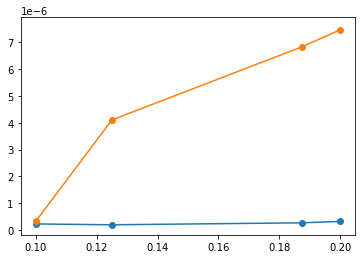




In [17]:
# initializing a constant weight net
# https://discuss.pytorch.org/t/how-to-add-appropriate-noise-to-a-neural-network-with-constant-weights-so-that-back-propagation-training-works/93411

# import torch

# [layer.reset_parameters() for layer in base_model.children() if hasattr(layer, 'reset_parameters')]

# model = nn.Linear(1, 1)
# model_copy = copy.deepcopy(model)